In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sls
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## getting the housing price data

In [70]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

## framing the data as a pandas dataframe

In [71]:
column_names = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT"
]
dataframe = pd.DataFrame(data, columns = column_names)

dataframe['target'] = target

print(dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


## Inspecting the data of the dataframe
### checking for null values

In [72]:
dataframe.isnull().sum()
# no missing values in the dataset

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [73]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### inspecting the correlation between the features
here we create a heatmap to undestand the correlation

<Axes: >

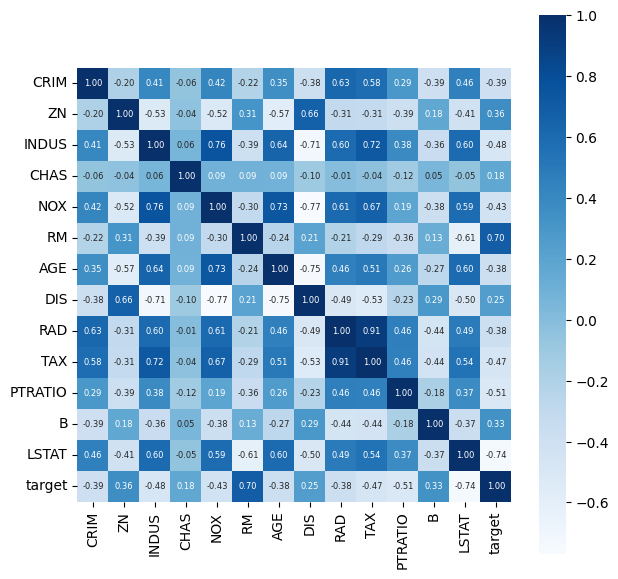

In [74]:
correlation = dataframe.corr()
plt.figure(figsize=(7,7))
sls.heatmap(correlation, cbar = True, square = True, fmt= '.2f', annot = True, annot_kws={'size':6}, cmap = 'Blues')

## preparing the data
### Spliting the data from the target

In [75]:
X = dataframe.drop(['target'], axis = 1)
Y = dataframe['target']

### Spliting the data into training and test data

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2)

## Training the model

In [77]:
# loading the model
model = XGBRegressor()

In [78]:
# training the model with X_train data
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluating test data
### prediction through the test_data

In [79]:
# prediction for our training data
training_data_prediction = model.predict(X_train)

### comparing the trainig data prediction to Y_train, which is the actual pricing data

In [81]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean absoloute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print(score_1, score_2)

0.9999980039471451 0.0091330346494618


In [82]:
### comparing the test data prediction to Y_test, which is the actual pricing data

In [84]:
# prediction for our test data
test_data_prediction = model.predict(X_test)

In [86]:
# R squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean absoloute error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(score_3, score_4)

0.9051721149855378 2.0748727686264927


## Visulaizing the diffrenece between the prediciton and actual prices


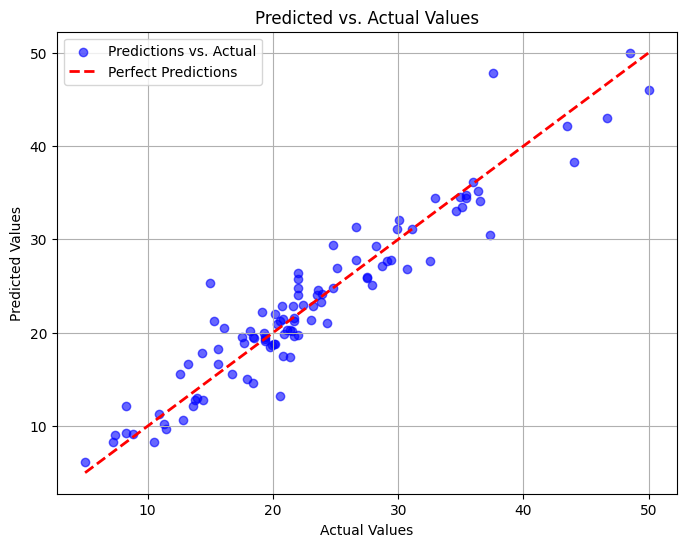

In [88]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, test_data_prediction, c='b', label='Predictions vs. Actual', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', lw=2, label='Perfect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()